In [1]:
import csv

import matplotlib.pyplot as plt

In [2]:
def read_points(dataset_name):
    points = []
    with open (dataset_name, 'r') as fin:
        csvReader = csv.reader(fin, delimiter=',')
        for row in csvReader:
            if csvReader.line_num != 1:
                points.append([[float(row[0]), float(row[1])]])
    return points

In [3]:
def squaredPointDistance(x, y):
        return ((x[0] - y[0]) ** 2 + (x[1] - y[1]) ** 2)

In [4]:
def pointSum(points):
    sum = [0,0]
    for point in points:
        sum[0] += point[0]
        sum[1] += point[1]
    sum[0] = sum[0] / len(points)
    sum[1] = sum[1] / len(points)
    return sum

In [5]:
def distance(x, y):
    return len(x) * len(y) * 1.0 / (len(x) + len(y)) * squaredPointDistance(pointSum(x), pointSum(y))

In [6]:
def genClosestClusters(clusters):
    minD = distance(clusters[0], clusters[1])
    minPair = (clusters[0], clusters[1])
    for cluster1 in clusters:
        for cluster2 in clusters:
            if not cluster1 == cluster2:
                d = distance(cluster1, cluster2)
                if d < minD:
                    minD = d
                    minPair = (cluster1, cluster2)
    return minPair
        

In [7]:
colors = ['hotpink', 'lime', 'slateblue', 'orangered', 'indigo']
def draw_point(x, y, color, size=20):
    plt.scatter(x, y, size, color)

In [8]:
def agglomerativeClustering(dataset_name):
    clusters = read_points(dataset_name)
    while(len(clusters) > 2):
        closestClusters = genClosestClusters(clusters)
        #print(len(clusters))
        clusters.remove(closestClusters[0])
        clusters.remove(closestClusters[1])
        clusters.append(closestClusters[0] + closestClusters[1])
        if (len(clusters) <= 5):
            color = 0
            for cluster in clusters:
                for point in cluster:
                    draw_point(point[0], point[1], colors[color])
                color += 1
            plt.show()

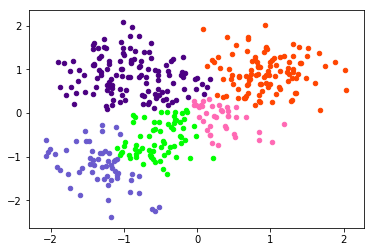

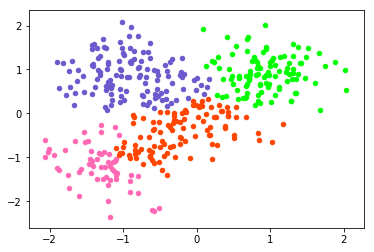

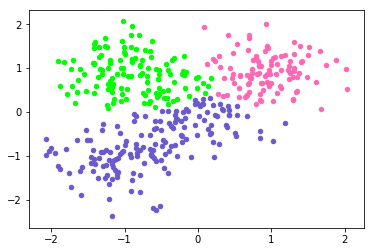

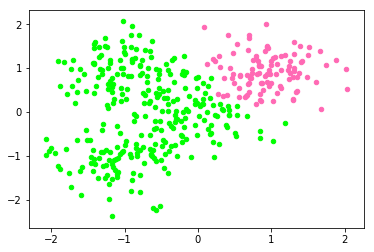

In [9]:
agglomerativeClustering('datasets/blobs.csv')